[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


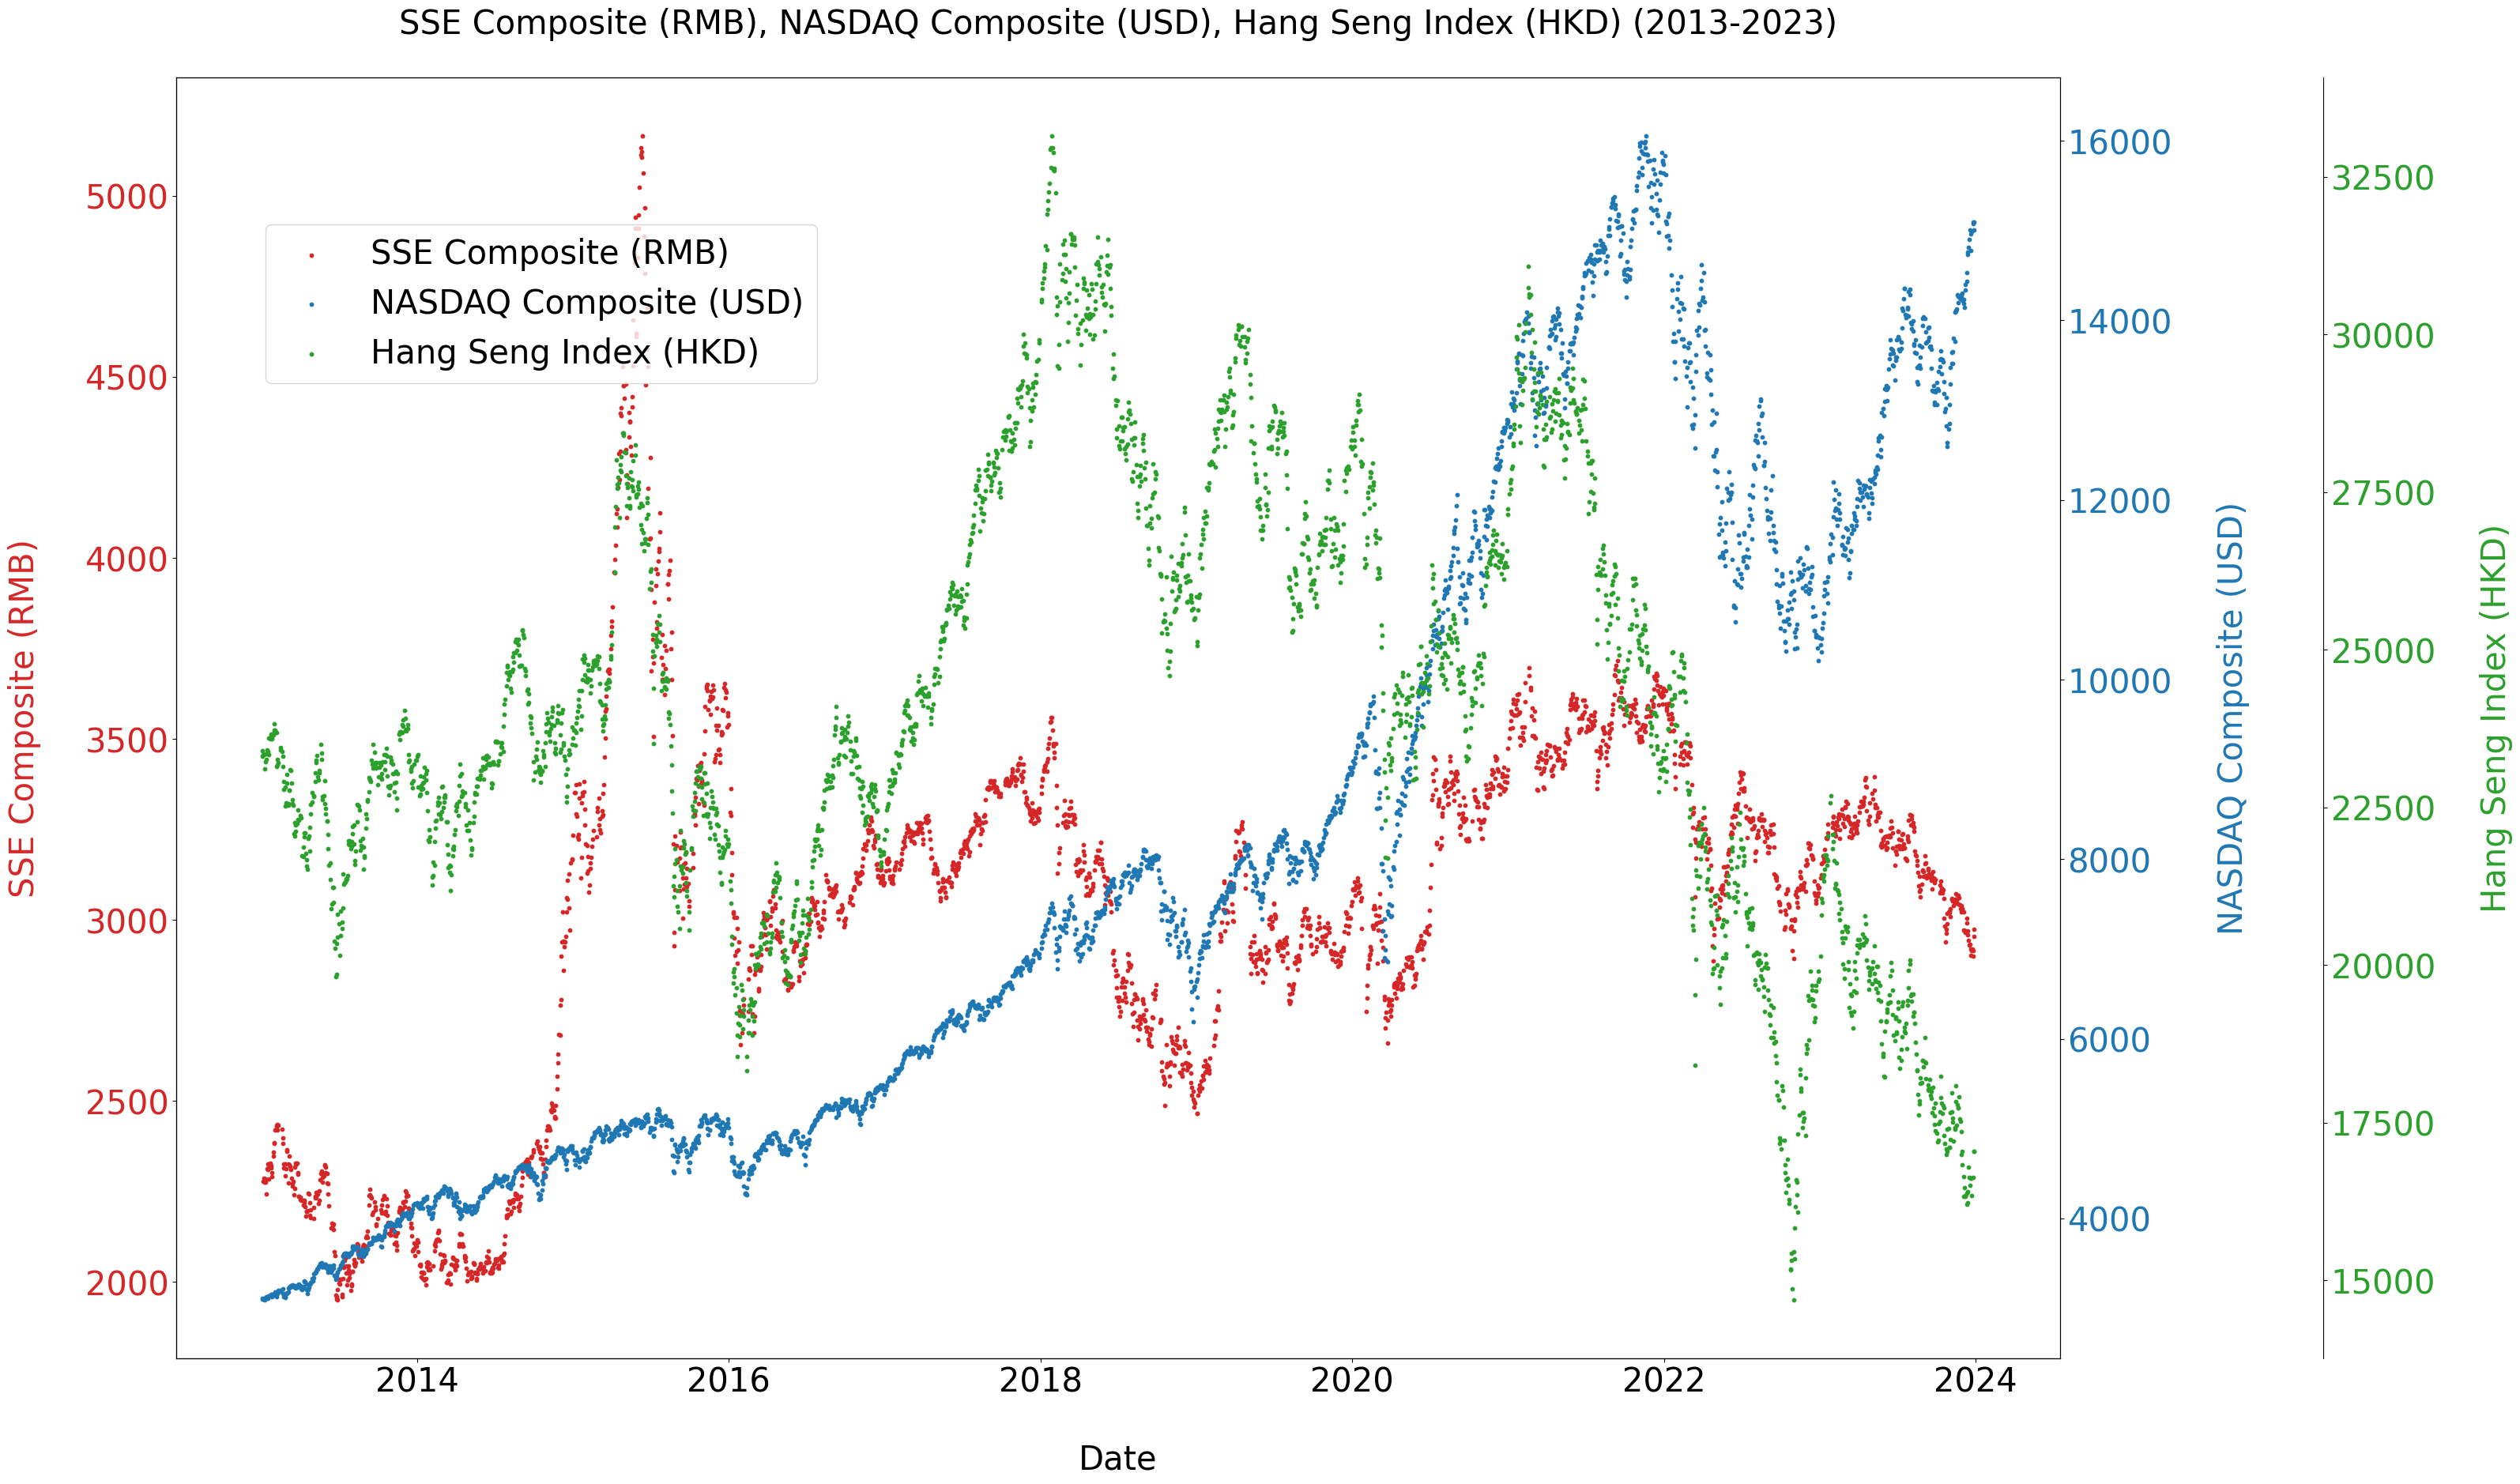

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the indexes we need to fetch
indexes = {
    'SSE Composite (RMB)': '000001.SS',
    'NASDAQ Composite (USD)': '^IXIC',
    'Hang Seng Index (HKD)': '^HSI'
}

# Dictionary to store the data
data = {}

# Fetch 10 years of data for each index
for name, ticker in indexes.items():
    data[name] = yf.download(ticker, start='2013-01-01', end='2023-12-31')['Adj Close']

# Create a multi-axis chart with specified size (32 inches x 18 inches)
fig, ax1 = plt.subplots(figsize=(32, 18))

# Set the font size
font_size = 30
label_pad = 40

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=font_size, labelpad=label_pad)
ax1.set_ylabel('SSE Composite (RMB)', color=color, fontsize=font_size, labelpad=label_pad)
ax1.scatter(data['SSE Composite (RMB)'].index, data['SSE Composite (RMB)'], color=color, label='SSE Composite (RMB)', s=10)
ax1.tick_params(axis='y', labelcolor=color, labelsize=font_size)
ax1.tick_params(axis='x', labelsize=font_size)

# Create second y-axis on the right
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('NASDAQ Composite (USD)', color=color, fontsize=font_size, labelpad=label_pad)
ax2.scatter(data['NASDAQ Composite (USD)'].index, data['NASDAQ Composite (USD)'], color=color, label='NASDAQ Composite (USD)', s=10)
ax2.tick_params(axis='y', labelcolor=color, labelsize=font_size)

# Adjust the position of the second y-axis
ax2.spines['right'].set_position(('outward', 0))

# Create third y-axis on the right, adjusted to not overlap
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 240))  # Move the third y-axis further to the right
color = 'tab:green'
ax3.set_ylabel('Hang Seng Index (HKD)', color=color, fontsize=font_size, labelpad=label_pad)
ax3.scatter(data['Hang Seng Index (HKD)'].index, data['Hang Seng Index (HKD)'], color=color, label='Hang Seng Index (HKD)', s=10)
ax3.tick_params(axis='y', labelcolor=color, labelsize=font_size)

# Adjust the position of the third y-axis label to avoid overlap
ax3.yaxis.set_label_position('right')

# Add legend
fig.tight_layout()  # Automatically adjust subplot parameters to give some padding for the labels
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=font_size)

plt.title('SSE Composite (RMB), NASDAQ Composite (USD), Hang Seng Index (HKD) (2013-2023)', fontsize=font_size, pad=label_pad)
plt.show()